# Análise dos acidentes de trânsito de Porto Alegre

Você atua no departamento de análise de dados da EPTC e o time de gestores(as) precisa de algumas informações sobre os acidentes para avaliar necessidades de ações para evitar novas ocorrências.

Assim, com base nos registros disponibilizados, você terá que responder as seguintes perguntas:

**Perguntas**


1.   Como está a evolução dos acidentes nos últimos anos?
2.   O número de acidentes diminuiu de 2019 para 2020?
3.   Quais são os tipos de acidentes com maior ocorrência?
4.   Qual a frequência de óbitos em acidentes nos últimos anos?
5.   Qual o tipo de acidente com maior número de óbitos?

Adicionalmente, você é instigado a realizar uma apresentação, com os locais dos acidentes ocorridos ao longo desse ano.

**Nota**

Abuse das visões gráficas para embasar sua análise.

Aqui está o link para os nossos dados:

https://dadosabertos.poa.br/dataset/acidentes-de-transito-acidentes

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
URL_arquivo = 'https://dadosabertos.poa.br/dataset/d6cfbe48-ee1f-450f-87f5-9426f6a09328/resource/b56f8123-716a-4893-9348-23945f1ea1b9/download/cat_acidentes.csv'

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df_raw = pd.read_csv(URL_arquivo, sep=';')
df_raw.head()

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,...,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2022-04-01 01:33:46,0,0.0,2020-10-17 00:00:00,1,0,0,0,0,3,...,0.000000,0.000000,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE,NaN
1,2022-04-01 01:33:46,2473,0.0,2017-01-01 00:00:00,1,0,0,0,0,1,...,-51.195897,-30.040376,R VICENTE DA FONTOURA,NaN,ABALROAMENTO,DOMINGO,10:00:00.0000000,DIA,LESTE,NaN
2,2022-04-01 01:33:46,7221,0.0,2017-01-01 00:00:00,1,0,0,0,0,1,...,-51.143758,-30.069058,AV BENTO GONCALVES,NaN,ATROPELAMENTO,DOMINGO,19:15:00.0000000,NOITE,LESTE,NaN
3,2022-04-01 01:33:46,229,0.0,2017-01-01 00:00:00,1,0,0,0,0,2,...,-51.098735,-30.219852,ESTR DO VAREJAO,NaN,ABALROAMENTO,DOMINGO,22:00:00.0000000,NOITE,SUL,NaN
4,2022-04-01 01:33:46,141,0.0,2017-01-02 00:00:00,1,0,0,0,0,0,...,-51.228123,-30.028190,LG JORNALISTA GLENIO PERES,NaN,CHOQUE,SEGUNDA-FEIRA,02:50:00.0000000,NOITE,CENTRO,NaN


In [9]:
df_raw.shape

(62626, 34)

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62626 entries, 0 to 62625
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data_extracao  62626 non-null  object 
 1   predial1       62626 non-null  int64  
 2   queda_arr      62626 non-null  float64
 3   data           62626 non-null  object 
 4   feridos        62626 non-null  int64  
 5   feridos_gr     62626 non-null  int64  
 6   mortes         62626 non-null  int64  
 7   morte_post     62626 non-null  int64  
 8   fatais         62626 non-null  int64  
 9   auto           62626 non-null  int64  
 10  taxi           62626 non-null  int64  
 11  lotacao        62626 non-null  int64  
 12  onibus_urb     62626 non-null  int64  
 13  onibus_met     62626 non-null  int64  
 14  onibus_int     62626 non-null  int64  
 15  caminhao       62626 non-null  int64  
 16  moto           62626 non-null  int64  
 17  carroca        62626 non-null  int64  
 18  bicicl

In [11]:
df_raw['data'].isnull().sum()

0

In [21]:
df_analise = df_raw.copy()

In [13]:
df_analise.shape

(62626, 34)

In [14]:
df_analise['data'] = pd.to_datetime(df_analise['data'])

OutOfBoundsDatetime: ignored

In [22]:
df_analise['ano'] = df_analise['data'].apply(lambda x : x.split('-')[0]).astype('int')

In [23]:
df_analise['ano'].head(2)

0    2020
1    2017
Name: ano, dtype: int64

In [24]:
df_analise['ano'].unique()

array([2020, 2017, 2018, 2019, 2021, 2022, 2202, 8032, 2025])

In [29]:
df_analise = df_analise[df_analise['ano'].isin((2017, 2018, 2019, 2020, 2021, 2022))]

In [32]:
df_raw.shape[0] - df_analise.shape[0]

3

In [33]:
df_analise['data'] = pd.to_datetime(df_analise['data'])

1. Como está a evolução dos acidentes nos últimos anos?

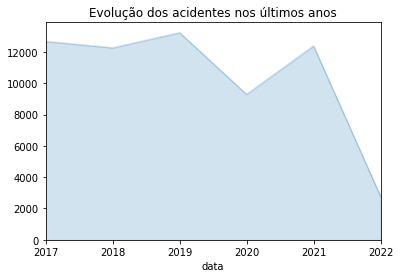

In [37]:
plt.title('Evolução dos acidentes nos últimos anos')
df_analise.groupby(pd.Grouper(key='data', freq='y'))['idacidente'].count().plot(kind='area', alpha=.2)
plt.show()

2. O número de acidentes diminuiu de 2019 para 2020?

In [47]:
df_compara_ano = df_analise[ df_analise['ano'].isin((2019,2020)) ]
df_compara_ano.head(2)

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,...,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio,ano
0,2022-04-01 01:33:46,0,0.0,2020-10-17,1,0,0,0,0,3,...,0.000000e+00,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE,NaN,2020
24479,2022-04-01 01:33:46,6699,0.0,2019-01-01,1,0,0,0,0,3,...,1.295680e+09,AV ASSIS BRASIL,NaN,ABALROAMENTO,TERÇA-FEIRA,02:45:00.0000000,NOITE,NORTE,NaN,2019


In [40]:
df_compara_ano.shape

(22521, 35)

In [48]:
df_compara_ano = pd.DataFrame(df_compara_ano.groupby(by='ano')['idacidente'].count())
df_compara_ano.reset_index(inplace=True)

In [49]:
df_compara_ano

,ano,idacidente
0,2019,13229
1,2020,9292


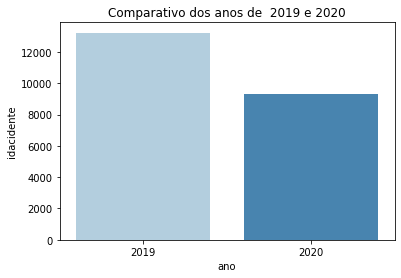

In [56]:
plt.title('Comparativo dos anos de  2019 e 2020')
plt.xlabel('Ano')
plt.ylabel('Qtd de Acidentes')
sns.barplot(data=df_compara_ano, x='ano', y='idacidente', palette='Blues')
plt.show()

3. Quais são os tipos de acidentes com maior ocorrência?


In [75]:
#quais sao os tipos_acidentes?
print(df_analise['tipo_acid'].unique())
tipo_acidentes = pd.DataFrame(df_analise.groupby(by='tipo_acid')['idacidente'].count())
tipo_acidentes.reset_index(inplace=True)
tipo_acidentes = tipo_acidentes.sort_values(by=['idacidente'], ascending=False)
tipo_acidentes

['ABALROAMENTO' 'ATROPELAMENTO' 'CHOQUE' 'COLISÃO' 'QUEDA' 'TOMBAMENTO'
 'EVENTUAL' 'CAPOTAGEM' 'INCÊNDIO' 'NAO CADASTRADO']


,tipo_acid,idacidente
0,ABALROAMENTO,30247
4,COLISÃO,18986
3,CHOQUE,5480
1,ATROPELAMENTO,3848
8,QUEDA,2004
5,EVENTUAL,959
7,NAO CADASTRADO,517
2,CAPOTAGEM,284
9,TOMBAMENTO,275
6,INCÊNDIO,23


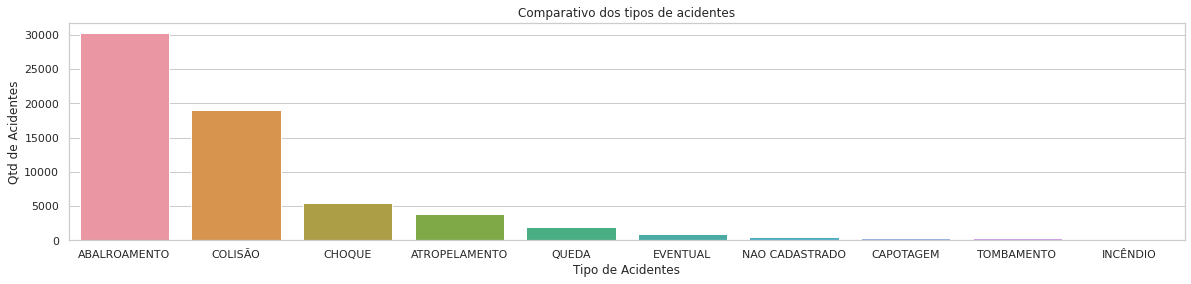

In [73]:
plt.figure(figsize=(20,4))


sns.barplot(data=tipo_acidentes, x='tipo_acid', y='idacidente')
sns.set_theme(style="whitegrid", palette='Blues')
plt.title('Comparativo dos tipos de acidentes')
plt.xlabel('Tipo de Acidentes')
plt.ylabel('Qtd de Acidentes')
plt.show()

In [86]:

tipo_acidentes = pd.DataFrame(df_analise.groupby(by=['ano','tipo_acid'])['idacidente'].count())
tipo_acidentes.reset_index(inplace=True)

In [87]:
tipo_acidentes

,ano,tipo_acid,idacidente
0,2017,ABALROAMENTO,6331
1,2017,ATROPELAMENTO,889
2,2017,CAPOTAGEM,40
3,2017,CHOQUE,975
4,2017,COLISÃO,3819
5,2017,EVENTUAL,185
6,2017,INCÊNDIO,3
7,2017,NAO CADASTRADO,1
8,2017,QUEDA,412
9,2017,TOMBAMENTO,16


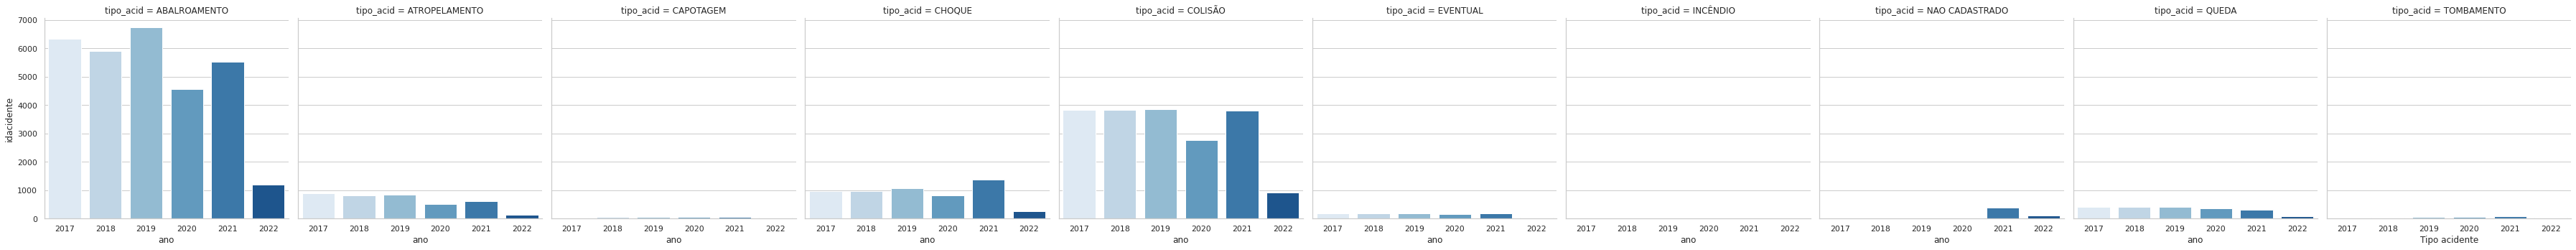

In [95]:
sns.factorplot(data=tipo_acidentes, x='ano', y='idacidente', col='tipo_acid', kind='bar')
plt.xlabel('Tipo acidente')
plt.show()

4. Qual a frequência de óbitos em acidentes nos últimos anos?

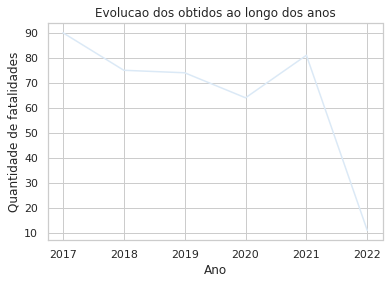

In [98]:
obitos = pd.DataFrame(df_analise.groupby(by='ano')['fatais'].sum())
sns.lineplot(data= obitos, x='ano', y='fatais')
plt.title('Evolucao dos obtidos ao longo dos anos')
plt.xlabel("Ano")
plt.ylabel("Quantidade de fatalidades")
plt.show()

5. Qual o tipo de acidente com maior número de óbitos?

In [109]:
obitos = pd.DataFrame(df_analise.groupby(by=['ano','tipo_acid'])['fatais'].sum())

In [110]:
obitos.reset_index(inplace=True)

In [111]:
obitos = obitos.sort_values(by=['fatais'], ascending=False)

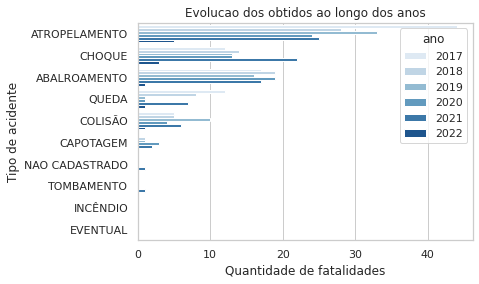

In [112]:
sns.barplot(data= obitos, y='tipo_acid', x='fatais', hue='ano')
plt.title('Evolucao dos obtidos ao longo dos anos')
plt.ylabel("Tipo de acidente")
plt.xlabel("Quantidade de fatalidades")
plt.show()

# Desafio do mapa

In [113]:
df_analise['longitude'].isnull().sum()

11067

In [114]:
mapa = df_analise[ df_analise['ano'] == 2022]

In [115]:
mapa['longitude'].isnull().sum()

112

In [116]:
mapa.shape

(2783, 35)

In [122]:
mapa= mapa[~mapa['log1'].isnull()]

In [123]:
mapa['log1'].isnull().sum()

0

In [124]:
mapa['log1'] = mapa['log1'].apply(lambda x : str(x) + ', Porto Alegre, RS, Brasil')

In [125]:
mapa['log1']

59614      AV ENG LUDOLFO BOEHL , Porto Alegre, RS, Brasil
59656             R JOAO ABBOTT , Porto Alegre, RS, Brasil
59658                  AV FORTE , Porto Alegre, RS, Brasil
59660        AV BENTO GONCALVES , Porto Alegre, RS, Brasil
59663    AV JUSCELINO KUBITSCHEK DE OLIVEIRA , Porto Al...
                               ...                        
62621                 R URUGUAI , Porto Alegre, RS, Brasil
62622       R QUINTINO BOCAIUVA , Porto Alegre, RS, Brasil
62623       R BARAO DO AMAZONAS , Porto Alegre, RS, Brasil
62624          R DONA MARGARIDA , Porto Alegre, RS, Brasil
62625            R ENG SALDANHA , Porto Alegre, RS, Brasil
Name: log1, Length: 2781, dtype: object

In [126]:
!pip install geopy

In [127]:
!pip install tqdm

In [128]:
enderecos = mapa[ mapa['longitude'].isnull()]
enderecos.shape

(112, 35)

In [129]:
from tqdm import tqdm
tqdm.pandas()

In [130]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent='app_tt')
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [131]:
enderecos['coordenadas'] = enderecos['log1'].progress_apply(geocode)

100%|██████████| 112/112 [02:04<00:00,  1.11s/it]


In [132]:
enderecos['coordenadas'].head()

59736    (Avenida João Wallig, Jardim Europa, Porto Ale...
59739    (Rua Engenheiro Teixeira Soares, Bela Vista, P...
59840    (Rua Engenheiro Antônio Carlos Tibiriçá, Jardi...
59842    (Avenida Sertório, Navegantes, Porto Alegre, R...
59870    (Rua Professor Clemente Pinto, Teresópolis, Po...
Name: coordenadas, dtype: object

In [133]:
enderecos['latitude'] = enderecos['coordenadas'].apply(lambda loc : loc.point[0] if loc else None)
enderecos['longitude'] = enderecos['coordenadas'].apply(lambda loc : loc.point[1] if loc else None)

In [136]:
enderecos[['log1','latitude','longitude']].head()

,log1,latitude,longitude
59736,"AV JOAO WALLIG , Porto Alegre, RS, Brasil",-30.022823,-51.163432
59739,"R ENG TEIXEIRA SOARES , Porto Alegre, RS, Brasil",-30.033800,-51.190505
59840,"R ENG ANTONIO CARLOS TIBIRICA , Porto Alegre, ...",-30.047607,-51.178486
59842,"AV SERTORIO , Porto Alegre, RS, Brasil",-29.999422,-51.201886
59870,"R PROF CLEMENTE PINTO , Porto Alegre, RS, Brasil",-30.074605,-51.213095


In [140]:
enderecos = enderecos[~enderecos['latitude'].isnull()]

In [142]:
enderecos['longitude'].isnull().sum()

0

In [143]:
enderecos.drop(columns='coordenadas', inplace=True)

In [145]:
mapa = mapa[ ~mapa['latitude'].isnull() ]

In [148]:
mapa['longitude'].isnull().sum()

0

In [149]:
mapa_final = pd.concat([mapa, enderecos])

In [151]:
mapa_final['longitude'].isnull().sum()

0

In [152]:
!pip install folium

In [153]:
mapa_final.shape[0]

2775

In [154]:
amostra = mapa_final.sample(50)

In [155]:
import folium

In [156]:
poa = folium.Map(
    location=[-30.16, -51.17],
    zoom_start=12
)

In [173]:
for index, linha in amostra.iterrows():
  folium.Marker(
      [linha['latitude'], linha['longitude']], 
      popup= linha['tipo_acid'] + " " + str(linha['data'])
      ).add_to(poa)

In [174]:
poa